We would approach this as a supervised learning task because we are learning from the data to try to predict a future outcome, in this case the future outcome being which groups to target recommendations to, and are not really trying to find what is interesting about the data or to find patterns in it, which is the goal of unsupervised learning. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
customer_data = pd.read_csv('/Users/alpha/Downloads/Data Science 1/Homeworks/hw3/data_h3_3337.csv')
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
customer_data.info()
#There is 200 observations in total
#There are no missing values in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
for column in customer_data:
    columnName = customer_data[column]
    print("Unique values in", column, ":", columnName.nunique())
    #gives amount of unique values in each column in output below

Unique values in CustomerID : 200
Unique values in Gender : 2
Unique values in Age : 51
Unique values in Annual Income (k$) : 64
Unique values in Spending Score (1-100) : 84


/Users/alpha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alpha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/alpha/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

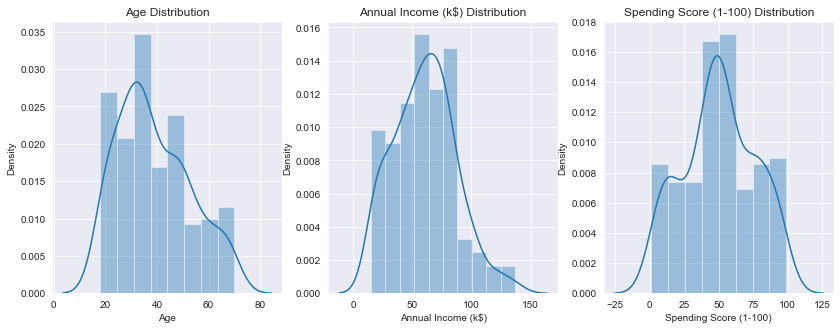

In [6]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 5))
left = sns.distplot(customer_data['Age'], kde = True, norm_hist = True, ax = axes[0])
left.set_title('Age Distribution')
middle = sns.distplot(customer_data['Annual Income (k$)'], kde = True, norm_hist = True, ax = axes[1])
middle.set_title('Annual Income (k$) Distribution')
right = sns.distplot(customer_data['Spending Score (1-100)'], kde = True, norm_hist = True, ax = axes[2])
right.set_title('Spending Score (1-100) Distribution')
plt.show()

Seems that many people in this dataset are between 20 - 50 years of age, with the highest number of people being in the age range of 30 - 40 years old. The majority of our dataset's annual income ranges from 50k - 90k, with the highest number of people having an income of ~60k and the second highest number of people having an income of ~80k. The spending score seems consistent having very little fluctuations except for a huge spike between 40 and 60, which suggests that many people have a spending score in that range. 

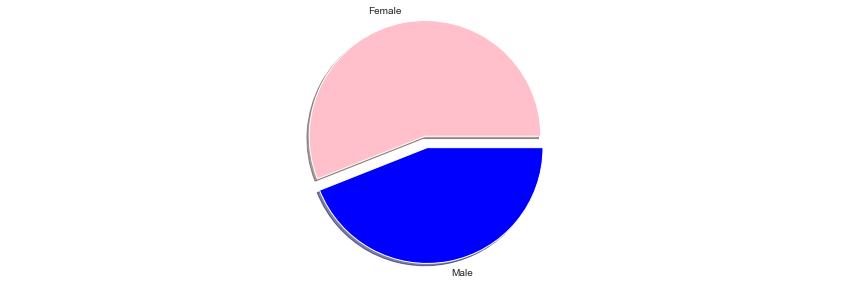

In [7]:
plt.pie(customer_data['Gender'].value_counts(), labels = ['Female', 'Male'], colors = ['Pink', 'Blue'], shadow = True, explode = [0, 0.1])
plt.axis('equal')
plt.show()

This dataset seems to be comprised of an almost even number of entries from both genders, having somewhat more females than males, although not by a significant amount.

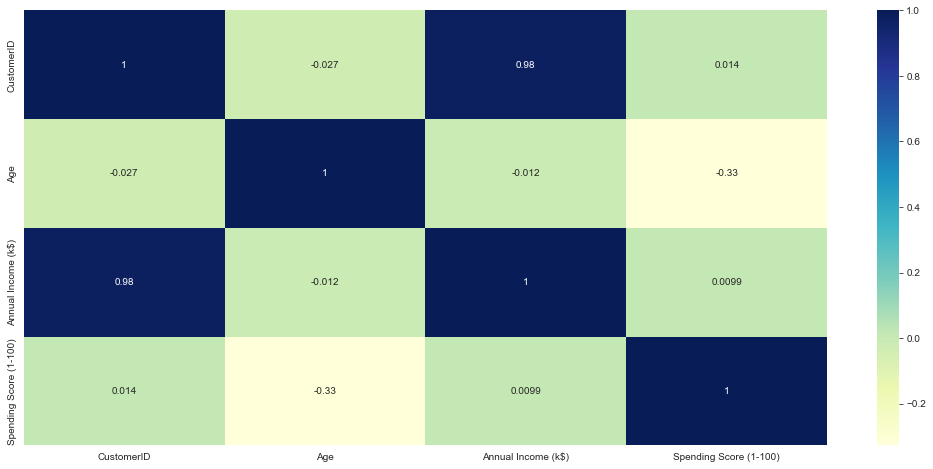

In [8]:
fig, ax = plt.subplots(figsize=(18,8))
sns.heatmap(customer_data.corr(), cmap = "YlGnBu", annot = True)
plt.show()

No significant multicollinearity exists except for with customer ID and annual income since the customers are labeled according to their annual income in ascending order, but we will ignore that since customer ID is not a relevant feature (is just numbering the customers).

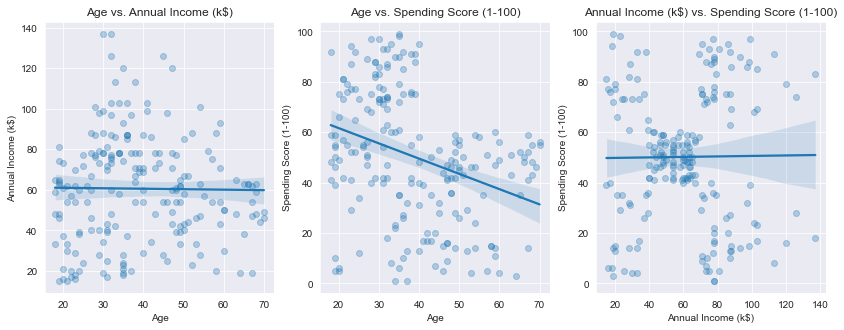

In [9]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (14, 5))
left = sns.regplot(x = customer_data['Age'], y = customer_data['Annual Income (k$)'], scatter_kws = {'alpha':0.3}, ax = axes[0])
left.set_title('Age vs. Annual Income (k$)')
middle = sns.regplot(x = customer_data['Age'], y = customer_data['Spending Score (1-100)'], scatter_kws = {'alpha':0.3}, ax = axes[1])
middle.set_title('Age vs. Spending Score (1-100)')
right = sns.regplot(x = customer_data['Annual Income (k$)'], y = customer_data['Spending Score (1-100)'], scatter_kws = {'alpha':0.3}, ax = axes[2])
right.set_title('Annual Income (k$) vs. Spending Score (1-100)')
plt.show()

There does not seem to be any correlation between age and annual income nor with annual income and spending score. Although we do see a cluster between 40 and 60 for annual income vs. spending score. There appears to be a weak negative correlation between age and spending score. This might suggest that as people get older, their spending scores tend to decrease. We can see from the plot that those above the age of 40 only have a spending score of under 60, but those below 40 years old can have spending scores going all the way up to 100. 

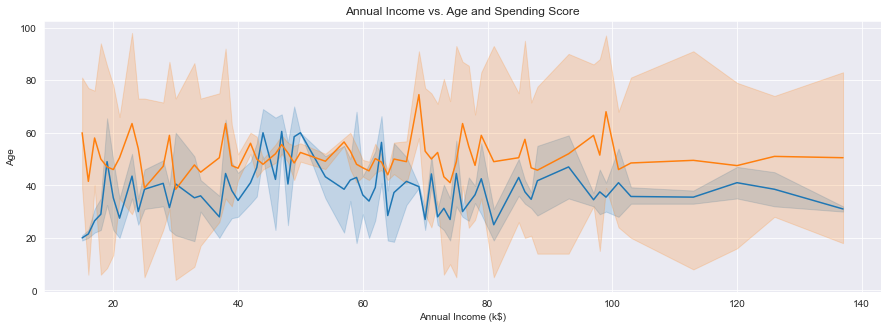

In [10]:
g = sns.lineplot(x = customer_data['Annual Income (k$)'], y = customer_data['Age'])
sns.lineplot(x = customer_data['Annual Income (k$)'], y = customer_data['Spending Score (1-100)'])
g.set_title('Annual Income vs. Age and Spending Score')
plt.show();

For people having an annual income between 40k-65k, age and spending score cross each other at times, which shows people in that income range can have varying ages but with similar spending scores. For the most part it seems that both age and spending score follow each other's pattern because as we observe different annual incomes, we can see that when the age increases/spikes up, the spending score tends to do the same. It is not exactly a huge increase like for example when the income is around 70k, there is a big spike in the spending score, but not that big of a spike in age, but we can see that the age still goes up. Thus, we can see that age and spending score tend to follow each other's pattern, not in any significant way all of the time, but as far as direction wise they seem to gravitate towards the same direction since when either changes direction, then so does the other. For those with an annual income over 100k, we start to see less fluctuations in age/spending scores and the line seems to flatten out, so people with an annual income in that range seem to have more consistant spending scores and ages, while those making under 100k we can see there being a lot of fluctuations in ages and spending scores. This might also have to do with the fact that there were not as many observations of people with over 100k income to begin with as there were of those with below 100k income, which may be why there is not any huge fluctuations after 100k annual income. 

In [11]:
X = customer_data.iloc[:, [3,4]].values

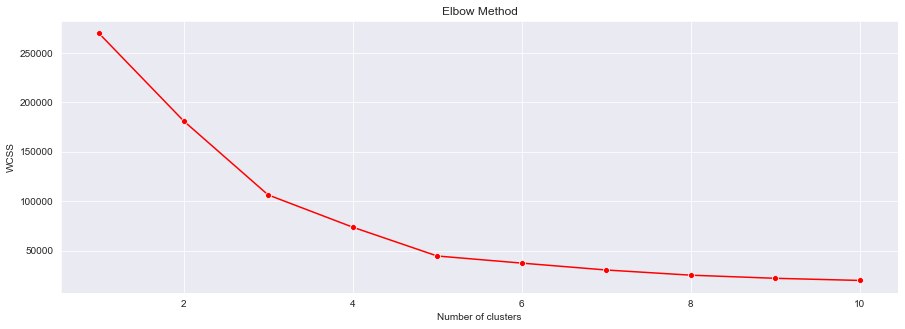

In [12]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
sns.lineplot(x = range(1, 11), y = wcss,marker = 'o',color = 'red')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
#Use 5 since that's where elbow is in figure, create k means model below
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_pred = kmeans.fit_predict(X)

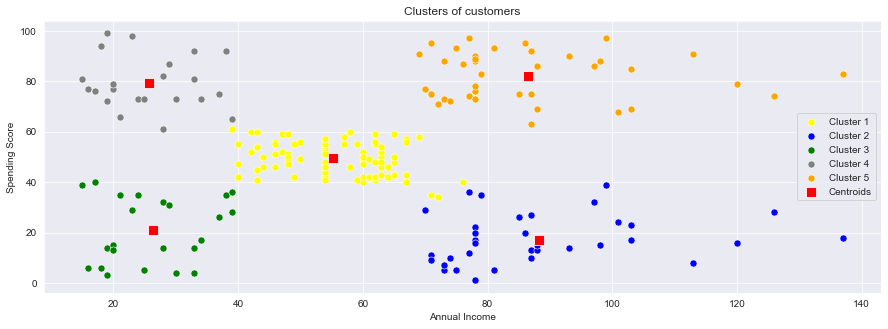

In [14]:
sns.scatterplot(x = X[y_pred == 0, 0], y = X[y_pred == 0, 1], color = 'yellow', label = 'Cluster 1',s = 50)
sns.scatterplot(x = X[y_pred == 1, 0], y = X[y_pred == 1, 1], color = 'blue', label = 'Cluster 2',s = 50)
sns.scatterplot(x = X[y_pred == 2, 0], y = X[y_pred == 2, 1], color = 'green', label = 'Cluster 3',s = 50)
sns.scatterplot(x = X[y_pred == 3, 0], y = X[y_pred == 3, 1], color = 'grey', label = 'Cluster 4',s = 50)
sns.scatterplot(x = X[y_pred == 4, 0], y = X[y_pred == 4, 1], color = 'orange', label = 'Cluster 5',s = 50)
sns.scatterplot(x = kmeans.cluster_centers_[:, 0], y = kmeans.cluster_centers_[:, 1], color = 'red', label = 'Centroids',s = 100,marker = ',')
plt.title('Clusters of customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler, normalize

scaler = StandardScaler()
scaled_df = scaler.fit_transform(X)

normalized_df = normalize(scaled_df)

normalized_df = pd.DataFrame(data = normalized_df)

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X_principal = pca.fit_transform(normalized_df)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

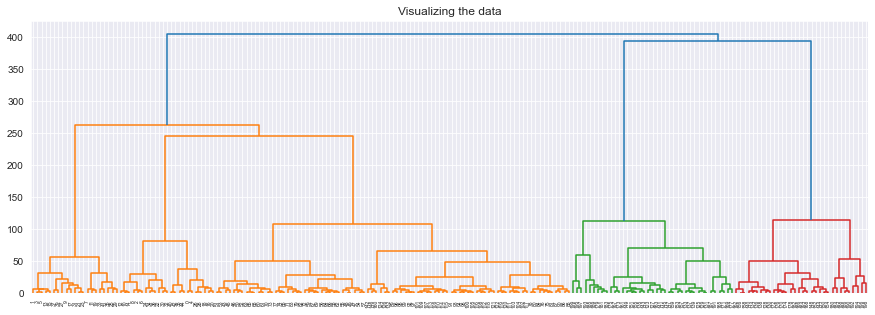

In [17]:
import scipy.cluster.hierarchy as shc

plt.title('Visualizing the data')
Dendrogram = shc.dendrogram((shc.linkage(X, method = 'ward')))

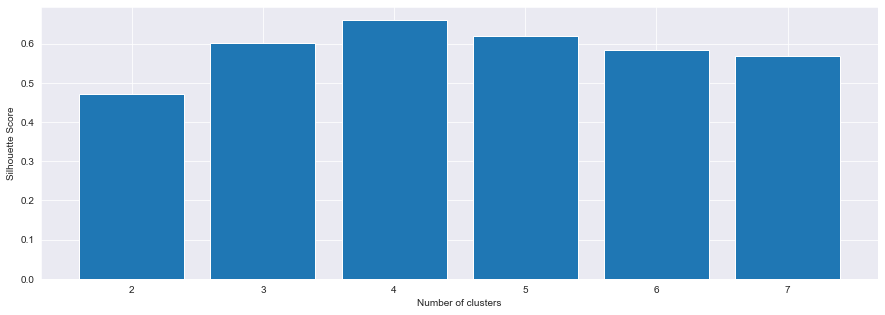

In [18]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

silhouette_scores = []

for n_cluster in range(2, 8):
    silhouette_scores.append(silhouette_score(X_principal, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal)))

plt.bar(x = range(2, 8), height = silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

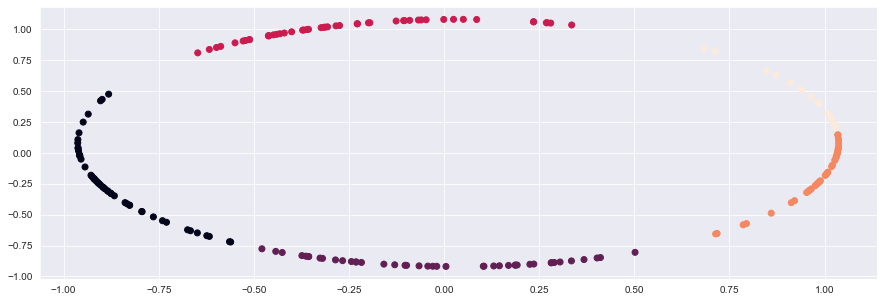

In [19]:
agg = AgglomerativeClustering(n_clusters = 5)
agg.fit(X_principal)
plt.scatter(X_principal['P1'], X_principal['P2'], c = AgglomerativeClustering(n_clusters = 5).fit_predict(X_principal))
plt.show()

In k-means we had to use the elbow method first in order to find the optimal number of clusters before grouping the data into those clusters. Hierarchical clustering basically determined the optimal number of clusters for us using the dendrogram. K-means is better to use when the number of clusters is a definitive number that we know of ahead of time, whereas hierarchical clustering is better to use when we do not know the exact number of clusters we are working with since it determines the optimal amount of clusters for us using the dendrogram. K-means is also faster when working with large amounts of data with many variables. However, it is not as easy to interpret k-means as it is to interpret hierarchical clustering, which is also more informative than k-means is. We could use k-means if we have a lot of data and know how many clusters we want that data to have ahead of time, since then we can easily predict what cluster a new data point belongs too without having to retrain the whole dataset like in hierarchical clustering. An example of when to use k-means could be when a business is looking at millions of potential customers and to determine what products they might prefer so they can target those products to the customers that are more likely to purchase that particular product. We can use hierarchical clustering for when there is not much data and we want the algorithm to determine the number of clusters for us, like when looking at employees in a small company to determine their preference for what political party they might support or to predict whether a student in a classroom is a cat person or a dog person. 